**Agricultural Production Optimization Engine**

>


**Problem Statement**: Build a predictive model so as to suggest the most suitable crops to grow base on the available climatic and soil conditions.
#####**Goal**  Achieve Precision Farming by optimizing agricultural production.



In [ ]:
#for manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

#for removing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Let's read the dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets/Crop_recommendation.csv')


In [ ]:
#Let's check the shape of the dataset
print("Shape of the Dataset :",df.shape)

Shape of the Dataset : (2200, 8)


In [ ]:
#Let's check the head of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#Let's check if there is any missing value present in the dataset
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
#Let's check the datatype of each column
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
#Let's check the crops present in this dataset
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## **Exploratory Data Analysis**

In [ ]:
#Lets check the summary for all the crops
print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(df["N"].mean()))
print("Average Ratio of Phosphorous in the soil : {0:.2f}".format(df["P"].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(df["K"].mean()))
print("Average Temperature in Celsius : {0:.2f}".format(df["temperature"].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(df["humidity"].mean()))
print("Average PH value of the soil : {0:.2f}".format(df["ph"].mean()))
print("Average Rainfall in mm : {0:.2f}".format(df["rainfall"].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Temperature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH value of the soil : 6.47
Average Rainfall in mm : 103.46


In [ ]:
#Let's check the summary statistics for each of the crop
@interact
def summary(crops = list(df["label"].value_counts().index)):
  x = df[df["label"] == crops]
  print("----------------------------------------------------")
  print("Statistics for Nitrogen")
  print("Minimum Nitrogen Required :", x["N"].min())
  print("Average Nitrogen Required :", x["N"].mean())
  print("Maximum Nitrogen Required :", x["N"].max())
  print("----------------------------------------------------")
  print("Statistics for Phosphorous")
  print("Minimum Phosphorous Required :", x["P"].min())
  print("Average Phosphorous Required :", x["P"].mean())
  print("Maximum Phosphorous Required :", x["P"].max())
  print("----------------------------------------------------")
  print("Statistics for Potassium")
  print("Minimum Potassium Required :", x["K"].min())
  print("Average Potassium Required :", x["K"].mean())
  print("Maximum Potassium Required :", x["K"].max())
  print("----------------------------------------------------")
  print("Statistics for Temperature")
  print("Minimum Temperature Required :{0:.2f}".format(x["temperature"].min()))
  print("Average Temperature Required :{0:.2f}".format(x["temperature"].mean()))
  print("Maximum Temperature Required :{0:.2f}".format(x["temperature"].max()))
  print("----------------------------------------------------")
  print("Statistics for Humidity")
  print("Minimum Humidity Required :{0:.2f}".format(x["humidity"].min()))
  print("Average Humidity Required :{0:.2f}".format(x["humidity"].mean()))
  print("Maximum Humidity Required :{0:.2f}".format(x["humidity"].max()))
  print("----------------------------------------------------")
  print("Statistics for PH")
  print("Minimum PH Required :{0:.2f}".format(x["ph"].min()))
  print("Average PH Required :{0:.2f}".format(x["ph"].mean()))
  print("Maximum PH Required :{0:.2f}".format(x["ph"].max()))
  print("----------------------------------------------------")
  print("Statistics for Rainfall")
  print("Minimum Rainfall Required :{0:.2f}".format(x["rainfall"].min()))
  print("Average Rainfall Required :{0:.2f}".format(x["rainfall"].mean()))
  print("Maximum Rainfall Required :{0:.2f}".format(x["rainfall"].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
#Lets Compare Average requirement for each crop with average conditions

@interact
def compare(conditions = ["N","P","K","temperature","humidity","rainfall","ph"]):
  print("Average value for",conditions,"is {0:.2f}".format(df[conditions].mean()))
  print("----------------------------------------------------------------")
  print("Rice : {0:.2f}".format(df[df['label']=='rice'][conditions].mean()))
  print("Maize : {0:.2f}".format(df[df['label']=='maize'][conditions].mean()))
  print("Chickpea : {0:.2f}".format(df[df['label']=='chickpea'][conditions].mean()))
  print("Kidneybeans : {0:.2f}".format(df[df['label']=='kidneybeans'][conditions].mean()))
  print("Pigeonpeas : {0:.2f}".format(df[df['label']=='pigeonpeas'][conditions].mean()))
  print("Mothbeans : {0:.2f}".format(df[df['label']=='mothbeans'][conditions].mean()))
  print("Mungbean : {0:.2f}".format(df[df['label']=='mungbean'][conditions].mean()))
  print("Blackgram : {0:.2f}".format(df[df['label']=='blackgram'][conditions].mean()))
  print("Lentil : {0:.2f}".format(df[df['label']=='lentil'][conditions].mean()))
  print("Pomegranate : {0:.2f}".format(df[df['label']=='pomegranate'][conditions].mean()))
  print("Banana : {0:.2f}".format(df[df['label']=='banana'][conditions].mean()))
  print("Mango : {0:.2f}".format(df[df['label']=='mango'][conditions].mean()))
  print("Grapes : {0:.2f}".format(df[df['label']=='grapes'][conditions].mean()))
  print("Watermelon : {0:.2f}".format(df[df['label']=='watermelon'][conditions].mean()))
  print("Muskmelon : {0:.2f}".format(df[df['label']=='muskmelon'][conditions].mean()))
  print("Apple : {0:.2f}".format(df[df['label']=='apple'][conditions].mean()))
  print("Orange : {0:.2f}".format(df[df['label']=='orange'][conditions].mean()))
  print("Papaya : {0:.2f}".format(df[df['label']=='papaya'][conditions].mean()))
  print("Coconut : {0:.2f}".format(df[df['label']=='coconut'][conditions].mean()))
  print("Cotton : {0:.2f}".format(df[df['label']=='cotton'][conditions].mean()))
  print("Jute : {0:.2f}".format(df[df['label']=='jute'][conditions].mean()))
  print("Coffee : {0:.2f}".format(df[df['label']=='coffee'][conditions].mean()))


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

In [ ]:
#Lets make this function more intuitive

@interact
def compare(conditions=["N","P","K","temperature","humidity","ph","rainfall"]):
  print("Crops that require greater than average",conditions,'\n')
  print(df[df[conditions]>df[conditions].mean()]['label'].unique(),'\n')
  print("Crops that require less than average",conditions,'\n')
  print(df[df[conditions]<df[conditions].mean()]['label'].unique())


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

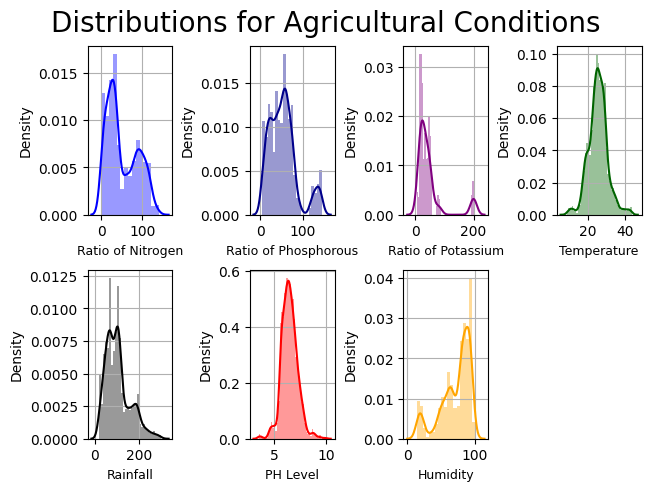

In [ ]:
#Distribution Plots
plt.figure(layout='constrained')
plt.subplot(2,4,1)
sns.distplot(df["N"],color="blue")
plt.xlabel("Ratio of Nitrogen",fontsize = 9)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df["P"],color="darkblue")
plt.xlabel("Ratio of Phosphorous",fontsize = 9)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df["K"],color="purple")
plt.xlabel("Ratio of Potassium",fontsize = 9)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df["temperature"],color="darkgreen")
plt.xlabel("Temperature",fontsize = 9)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df["rainfall"],color="black")
plt.xlabel("Rainfall",fontsize = 9)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df["ph"],color="red")
plt.xlabel("PH Level",fontsize = 9)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df["humidity"],color="orange")
plt.xlabel("Humidity",fontsize = 9)
plt.grid()

plt.suptitle("Distributions for Agricultural Conditions",fontsize=20)
plt.show()

In [ ]:
#Lets find out some interesting facts

print("Some interesting patterns")
print("-----------------------------")
print("Crop which require very High Ratio of Nitrogen content in the soil:",df[df["N"]>120]['label'].unique())
print("Crop which require very High Ratio of Phosphorous content in the soil:",df[df["P"]>100]['label'].unique())
print("Crop which require very High Ratio of Potassium content in the soil:",df[df["K"]>200]['label'].unique())
print("Crop which require very High Rainfall:",df[df["rainfall"]>200]['label'].unique())
print("Crop which require very Low Temperature:",df[df["temperature"]<10]['label'].unique())
print("Crop which require very High Temperature:",df[df["temperature"]>40]['label'].unique())
print("Crop which require very Low humidity:",df[df["humidity"]<20]['label'].unique())
print("Crop which require very Low PH:",df[df["ph"]<4]['label'].unique())
print("Crop which require very High PH:",df[df["ph"]>9]['label'].unique())

Some interesting patterns
-----------------------------
Crop which require very High Ratio of Nitrogen content in the soil: ['cotton']
Crop which require very High Ratio of Phosphorous content in the soil: ['grapes' 'apple']
Crop which require very High Ratio of Potassium content in the soil: ['grapes' 'apple']
Crop which require very High Rainfall: ['rice' 'papaya' 'coconut']
Crop which require very Low Temperature: ['grapes']
Crop which require very High Temperature: ['grapes' 'papaya']
Crop which require very Low humidity: ['chickpea' 'kidneybeans']
Crop which require very Low PH: ['mothbeans']
Crop which require very High PH: ['mothbeans']


In [ ]:
#Lets understand which crops can only be grown in Summer, winter and rainy season
print("Summer Crops")
print(df[(df["temperature"]>30) & (df["humidity"]>50)]['label'].unique())
print("-------------------------------------")
print("Winter Crops")
print(df[(df["temperature"]<20) & (df["humidity"]>30)]['label'].unique())
print("-------------------------------------")
print("Rainy Crops")
print(df[(df["rainfall"]>200) & (df["humidity"]>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


## **Clustering using KMeans**

In [ ]:
from sklearn.cluster import KMeans
#removing the label column
X = df.drop(["label"],axis=1)

#selecting all the values of the data
X=X.values

#Checking the shape
X.shape

(2200, 7)

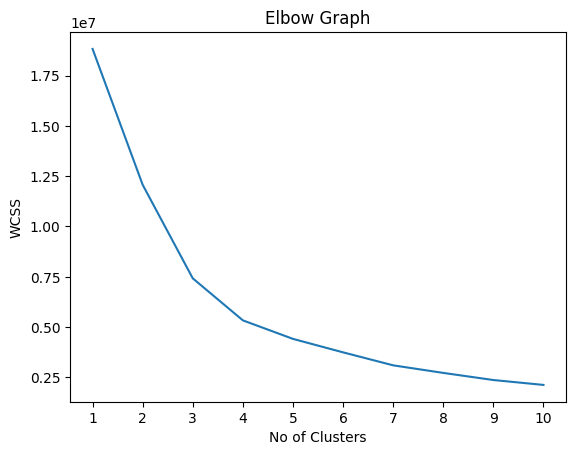

In [ ]:
#Let us determine the optimum number of clusters within the dataset

wcss = []

for k in range(1,11):
  km = KMeans(n_clusters = k, init = "k-means++",random_state=1,max_iter=300,n_init=10)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("Elbow Graph")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

plt.show()

In [ ]:
#Let us implement the k-means algorithm to perfrom clustering analysis

km = KMeans(n_clusters = 4, init = "k-means++",random_state=1,max_iter=300,n_init =10)
y_pred = km.fit_predict(X)

y_pred

array([3, 3, 3, ..., 3, 0, 3], dtype=int32)

In [ ]:
a = df['label']

y_pred = pd.DataFrame(y_pred)
z = pd.concat([y_pred,a],axis=1)
z = z.rename(columns={0:"Cluster"})
z

,Cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice
...,...,...
2195,3,coffee
2196,0,coffee
2197,3,coffee
2198,0,coffee


In [ ]:
#Let us check the cluster of each crops

print("Results after K-Means clustering analysis \n")

print("Crops in the First Cluster:",z[z["Cluster"]==0]["label"].unique())
print("************************************************************************")
print("Crops in the Second Cluster:",z[z["Cluster"]==1]["label"].unique())
print("************************************************************************")
print("Crops in the Third Cluster:",z[z["Cluster"]==2]["label"].unique())
print("************************************************************************")
print("Crops in the Fourth Cluster:",z[z["Cluster"]==3]["label"].unique())
print("************************************************************************")

Results after K-Means clustering analysis 

Crops in the First Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
************************************************************************
Crops in the Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
************************************************************************
Crops in the Third Cluster: ['grapes' 'apple']
************************************************************************
Crops in the Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
************************************************************************


## **Model Development**

In [ ]:
#Let us split the dataset for predictive moelling

X = df.iloc[:,:-1]
y = df["label"]

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [ ]:
#create training and testing sets for validation of results

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("Shape of X train:",X_train.shape)
print("Shape of y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of y test:",y_test.shape)

Shape of X train: (1760, 7)
Shape of y train: (1760,)
Shape of X test: (440, 7)
Shape of y test: (440,)


In [ ]:
#let us create a predictive model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

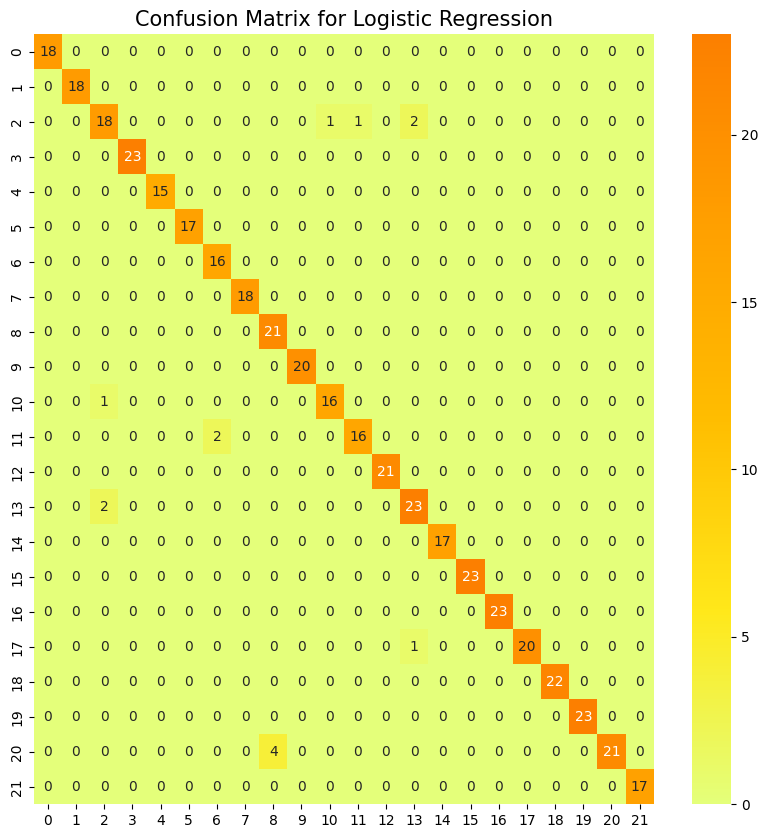

In [ ]:
#let us evaluate the model performance
from sklearn.metrics import confusion_matrix, classification_report

#lets print the confusion matrix first
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='Wistia')
plt.title("Confusion Matrix for Logistic Regression", fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

**The model has 97% accuracy.**

**Model Testing**

In [ ]:
prediction = model.predict(np.array([[90,42,43,20,82,6.5,202]]))

print("Suggested crop for given climatic condition: ",prediction)

Suggested crop for given climatic condition:  ['rice']
